<a href="https://colab.research.google.com/github/polock11/supervised_and_unsupervised_learning/blob/main/supervised_learning_decision_tree_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topics:

* Decission Tree
* plot decision tree

In [1]:
import numpy as np
import pandas as pd


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import r2_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('processed.cleveland.data', header = None, na_values='?')

#dropping all the nan/missing values
df = df.dropna()

df.columns = ['age', 'sex','cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'olepeak','slope','ca','thal', 'hd']

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,olepeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   olepeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  hd        297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
olepeak     0
slope       0
ca          0
thal        0
hd          0
dtype: int64

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
olepeak     0
slope       0
ca          0
thal        0
hd          0
dtype: int64

In [6]:
df['hd'].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64

In [7]:
#converting from multiclass to binary class
df[df['hd']> 1] = 1

In [8]:
df['hd'].value_counts()

0    160
1    137
Name: hd, dtype: int64

In [9]:
X = df.drop('hd', axis = 1)
y = df[['hd']]

#One_hot Encoding

In [10]:
X = pd.get_dummies(X, columns = ['restecg', 'slope', 'cp', 'ca', 'thal'], drop_first = True)

In [11]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'olepeak',
       'restecg_1.0', 'restecg_2.0', 'slope_2.0', 'slope_3.0', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42, stratify = y)

In [13]:
print(X.shape, y.shape)
print(X.columns)

(297, 21) (297, 1)
Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'olepeak',
       'restecg_1.0', 'restecg_2.0', 'slope_2.0', 'slope_3.0', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')


In [14]:
model_dt = DecisionTreeClassifier()
model_dt = model_dt.fit(X_train, y_train)

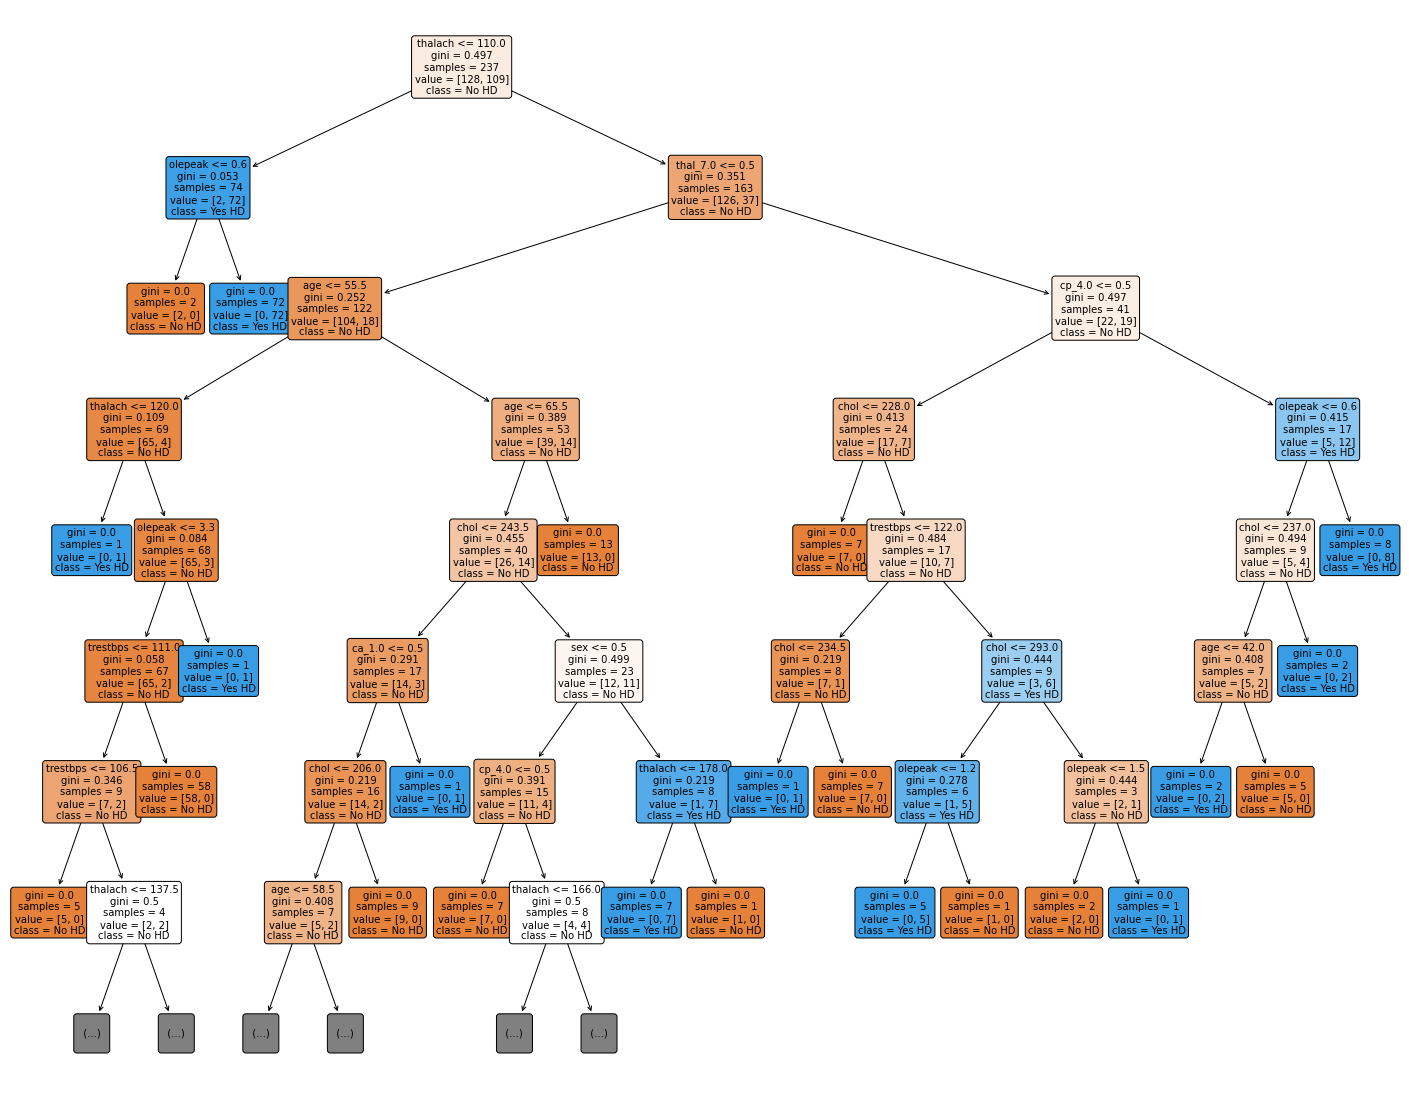

In [15]:
#Plot tree
from matplotlib import pyplot as plt

plt.figure(figsize = (25,20))

plot_tree(model_dt, 
          max_depth = 7, 
          feature_names = X.columns, 
          filled = True, 
          rounded = True, 
          class_names =['No HD', 'Yes HD'],
          fontsize = 10)

plt.show()

In [16]:
y_pred = model_dt.predict(X_test)

In [17]:
accuracy_ = accuracy_score(y_test, y_pred)
print('accuracy: ', accuracy_)

precision_ = precision_score(y_test, y_pred)
print('precision: ', precision_)

recall_ = recall_score(y_test, y_pred)
print('recall: ', recall_)

f1_ = f1_score(y_test, y_pred)
print('f1: ', f1_)

accuracy:  0.8333333333333334
precision:  0.8214285714285714
recall:  0.8214285714285714
f1:  0.8214285714285714


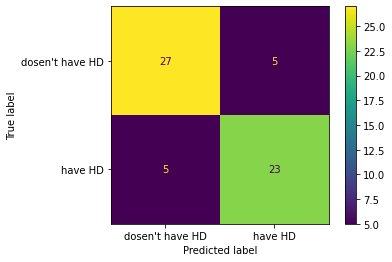

In [18]:
plot_confusion_matrix(model_dt,
                      X_test,y_test,
                      display_labels = ['dosen\'t have HD', 'have HD'])
plt.show()

In [19]:
classification_report_ = classification_report(y_test, y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



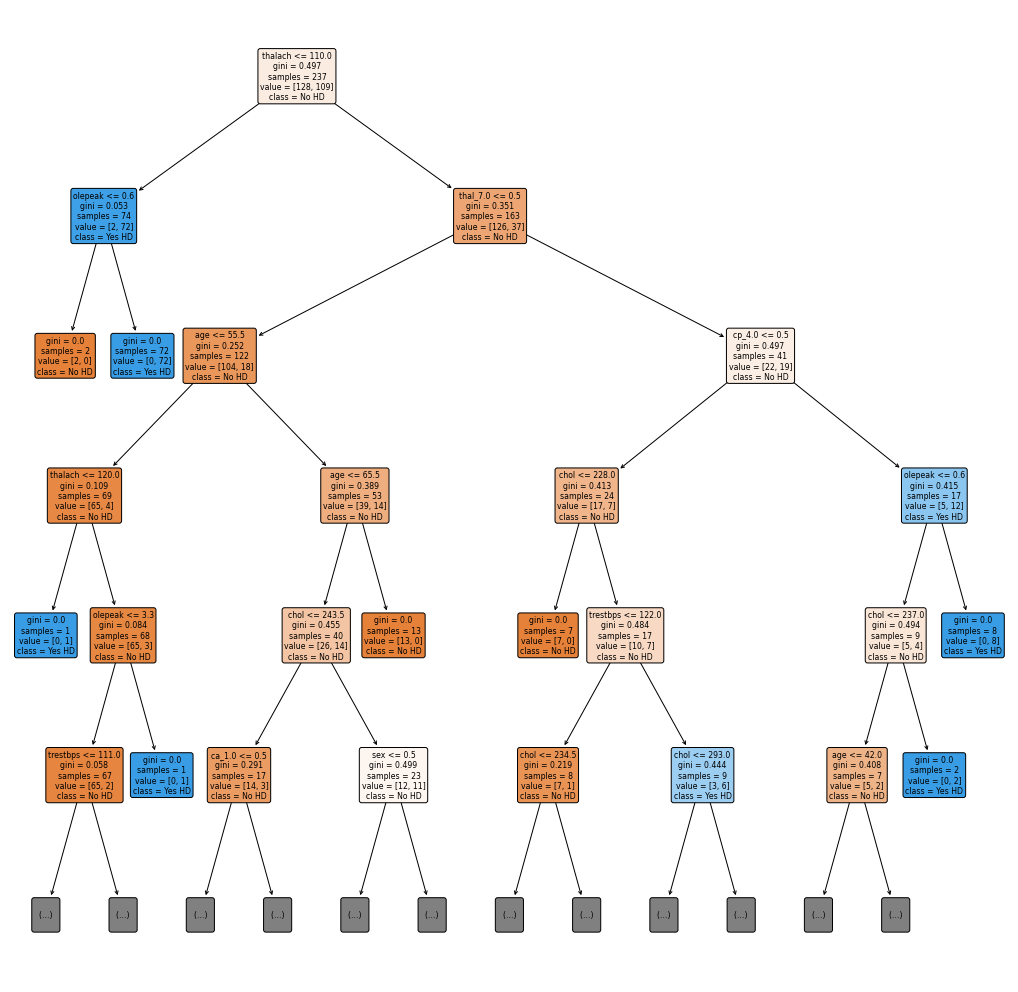

In [26]:
plt.figure(figsize = (18,18))
plot_tree(model_dt, max_depth = 5,
          feature_names = X_test.columns,
          rounded = True, class_names = ['No HD', 'Yes HD'],
          filled = True);

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



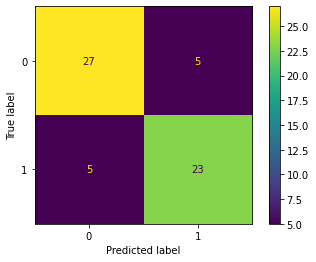

In [31]:
cr = classification_report(y_test, y_pred)
print(cr)

plot_confusion_matrix(model_dt,
                      X_test, y_test)